# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# Dataset 🧠

El dataset proviene de Kaggle: [Stroke prediction dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

# AED 1 🤓

## 1) Cargamos los datos 📕

In [67]:
import pandas as pd
data=pd.read_csv("healthcare-dataset-stroke-data.csv", sep = ",")

## 2) Estado de salud de un dataframe 👀

In [68]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [69]:
from funpymodeling.exploratory import status 
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5110,int64
1,gender,0,0.000000,0,0.000000,3,object
2,age,0,0.000000,0,0.000000,104,float64
3,hypertension,0,0.000000,4612,0.902544,2,int64
4,heart_disease,0,0.000000,4834,0.945988,2,int64
5,ever_married,0,0.000000,0,0.000000,2,object
6,work_type,0,0.000000,0,0.000000,5,object
7,Residence_type,0,0.000000,0,0.000000,2,object
8,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
9,bmi,201,0.039335,0,0.000000,418,float64


Eliminar columnas no relevantes para el análisis

In [74]:
data = data.drop(['id'], axis=1)

## 3) Variables numéricas

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

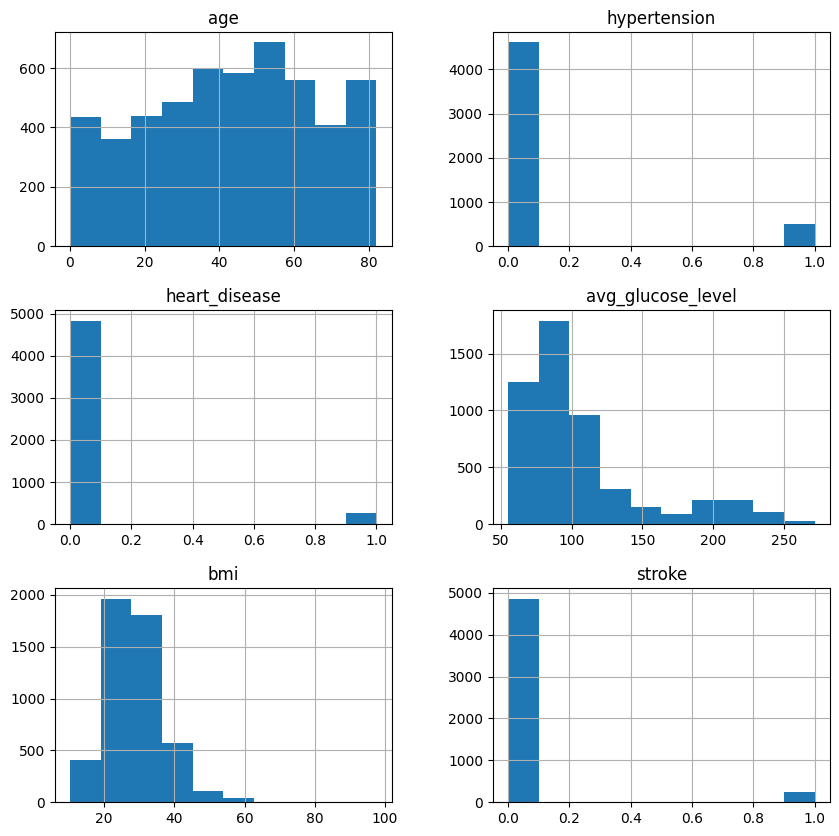

In [75]:
data.hist(figsize = (10,10))

In [76]:
from funpymodeling.exploratory import profiling_num

profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,43.226614,22.612647,0.523119,1.0800,5.0000,25.000,45.000,61.00,79.0000,82.0000
1,avg_glucose_level,106.147677,45.283560,0.426609,56.3309,60.7135,77.245,91.885,114.09,216.2945,240.7082
2,bmi,28.893237,7.854067,0.271831,15.1000,17.6400,23.500,28.100,33.10,42.9600,53.4000
3,heart_disease,0.054012,0.226063,4.185442,0.0000,0.0000,0.000,0.000,0.00,1.0000,1.0000
4,hypertension,0.097456,0.296607,3.043494,0.0000,0.0000,0.000,0.000,0.00,1.0000,1.0000
5,stroke,0.048728,0.215320,4.418813,0.0000,0.0000,0.000,0.000,0.00,0.0000,1.0000


Describe de Pandas

In [79]:
# La .T es de Transpuesta
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## 4) Variables categóricas

In [80]:
import seaborn as sns 

Vamos a ver 2 formas de expresar lo mismo.

<Axes: xlabel='count', ylabel='work_type'>

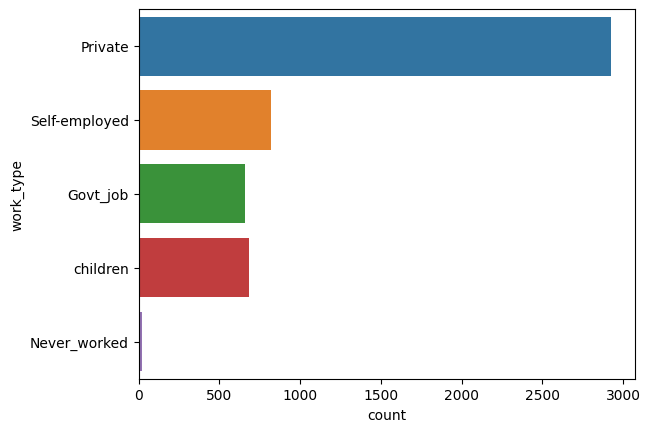

In [90]:
sns.countplot(y='work_type', data=data)    

<Axes: xlabel='count', ylabel='work_type'>

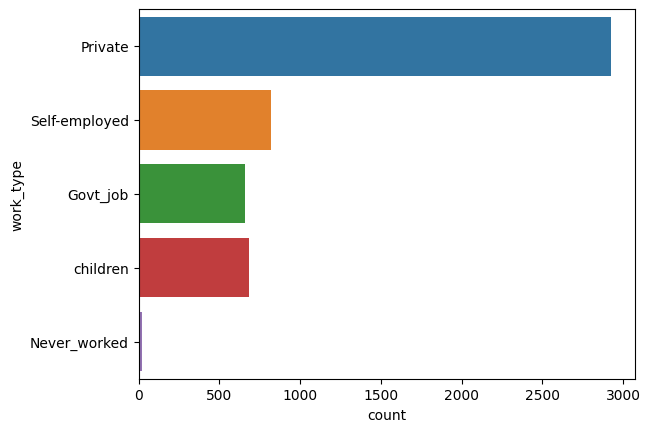

In [88]:
sns.countplot(y=data['work_type'])    

Ordenando por count

<Axes: xlabel='count', ylabel='work_type'>

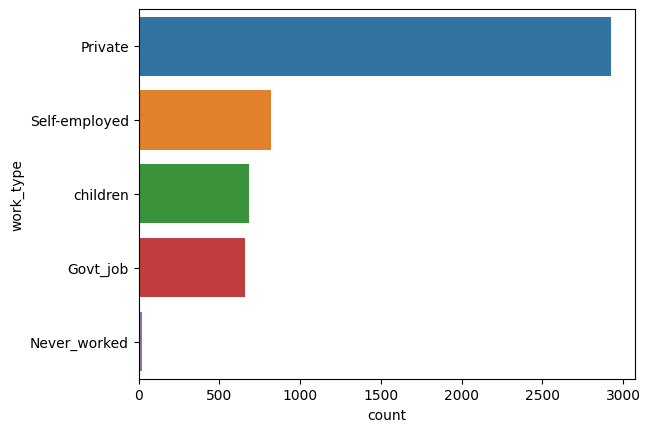

In [91]:
sns.countplot(y=data['work_type'], order = data['work_type'].value_counts().index)

In [ ]:
import matplotlib.pyplot as plt

Modificando el tamaño

In [92]:
import matplotlib.pyplot as plt

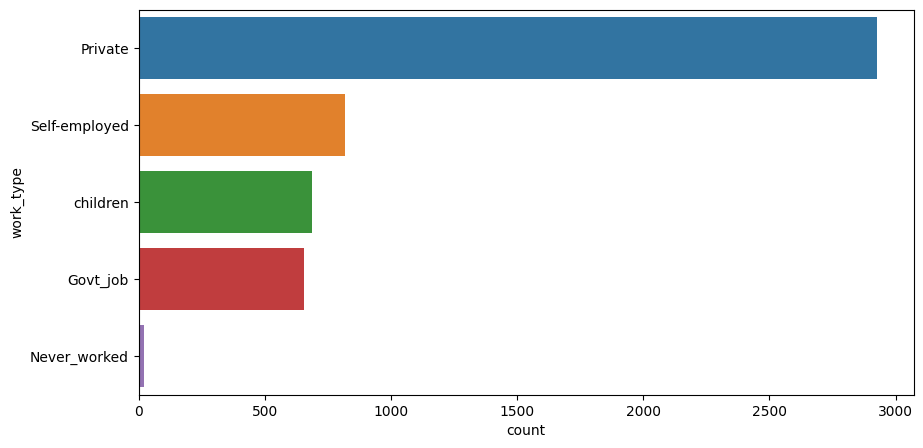

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['work_type'], order = data['work_type'].value_counts().index)
plt.show()

### Análisis cuantitativo de variables categóricas

In [96]:
from funpymodeling.exploratory import freq_tbl

In [97]:
freq_tbl(data['work_type'])

,work_type,frequency,percentage,cumulative_perc
0,Private,2925,0.572407,0.572407
1,Self-employed,819,0.160274,0.732681
2,children,687,0.134442,0.867123
3,Govt_job,657,0.128571,0.995695
4,Never_worked,22,0.004305,1.000000


_Nota:_ Acá usamos `query`, no se aconseja por quedar la query en un string.

In [98]:
t_country=freq_tbl(data.smoking_status)

t_country.query("frequency<=1000")['smoking_status']

2    formerly smoked
3             smokes
Name: smoking_status, dtype: object

### Resumen (hasta ahora)

- status (funpymodeling)
- profiling_num (funpyodeling)
- describe (pandas)
- hist (pandas)
- countplot (seaborn)
- freq_tbl

## 5) Pandas profiling

In [ ]:
#!pip3 install ydata-profiling

In [99]:
from ydata_profiling import ProfileReport

ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 477.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pero no vemos los NaN...

In [100]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.000000,0,0.000000,3,object
1,age,0,0.000000,0,0.000000,104,float64
2,hypertension,0,0.000000,4612,0.902544,2,int64
3,heart_disease,0,0.000000,4834,0.945988,2,int64
4,ever_married,0,0.000000,0,0.000000,2,object
5,work_type,0,0.000000,0,0.000000,5,object
6,Residence_type,0,0.000000,0,0.000000,2,object
7,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
8,bmi,201,0.039335,0,0.000000,418,float64
9,smoking_status,0,0.000000,0,0.000000,4,object


## Resumen 📌

#### Conceptos de:

- Análisis univariado
- Alta cardinalidad, tipos de datos, nulos, ceros
- Métricas de dispersión
- Var num y cat (gráficos y valores)

#### Funciones

- status (funpymodeling)
- profiling_num (funpymodeling)
- describe (pandas)
- hist (pandas)
- countplot (seaborn)
- freq_tbl

# AED 2 😧

## 1) Análisis de variables categóricas

Función freq_tbl de funpymodeling

In [101]:
freq_tbl(data['gender'])

,gender,frequency,percentage,cumulative_perc
0,Female,2994,0.585910,0.585910
1,Male,2115,0.413894,0.999804
2,Other,1,0.000196,1.000000


In [102]:
freq_tbl(data)

   gender  frequency  percentage  cumulative_perc
0  Female       2994    0.585910         0.585910
1    Male       2115    0.413894         0.999804
2   Other          1    0.000196         1.000000

----------------------------------------------------------------

  ever_married  frequency  percentage  cumulative_perc
0          Yes       3353    0.656164         0.656164
1           No       1757    0.343836         1.000000

----------------------------------------------------------------

       work_type  frequency  percentage  cumulative_perc
0        Private       2925    0.572407         0.572407
1  Self-employed        819    0.160274         0.732681
2       children        687    0.134442         0.867123
3       Govt_job        657    0.128571         0.995695
4   Never_worked         22    0.004305         1.000000

----------------------------------------------------------------

  Residence_type  frequency  percentage  cumulative_perc
0          Urban       2596    0.50

## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica

In [103]:
pd.crosstab(data.gender, data.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337
Other,0,1,0,0


In [104]:
pd.crosstab(data.gender, data.smoking_status, margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
gender,,,,,
Female,836,477,1229,452,2994
Male,708,407,663,337,2115
Other,0,1,0,0,1
All,1544,885,1892,789,5110


Porcentages totales (suma de celdas 100%)

In [106]:
pd.crosstab(data.gender, data.smoking_status, normalize=True)*100

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,16.360078,9.334638,24.050881,8.845401
Male,13.855186,7.964775,12.974560,6.594912
Other,0.000000,0.019569,0.000000,0.000000


Porcentages por registro (útil para selección de variables)

In [107]:
pd.crosstab(data["gender"], data.smoking_status, normalize='index', margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,0.279225,0.159319,0.410488,0.150969
Male,0.334752,0.192435,0.313475,0.159338
Other,0.000000,1.000000,0.000000,0.000000
All,0.302153,0.173190,0.370254,0.154403


Nota: Se usó la notación de punto como simple demostración, de ahora en más se usará la notación de corchetes por dos motivos:

En vez de `data.gender`, usar `data['gender']`. 
<br>Son más caracteres de tipeo, pero se estandariza el código.

- No se puede usar para crear columnas nuevas
- No funciona si las variables tienen espacios

In [108]:
pd.crosstab(data['gender'], data['work_type'], margins=True, normalize=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
gender,,,,,,
Female,0.078082,0.002153,0.343249,0.098630,0.063796,0.585910
Male,0.050489,0.002153,0.228963,0.061644,0.070646,0.413894
Other,0.000000,0.000000,0.000196,0.000000,0.000000,0.000196
All,0.128571,0.004305,0.572407,0.160274,0.134442,1.000000


### 2.B) Análisis de numérica vs. categórica

¿Cambia el valor de hipertensión en función del género?

In [109]:
data.groupby('gender')['hypertension'].mean()

gender
Female    0.092184
Male      0.104965
Other     0.000000
Name: hypertension, dtype: float64

In [110]:
data.groupby('gender')['hypertension'].mean().sort_values(ascending=False)

gender
Male      0.104965
Female    0.092184
Other     0.000000
Name: hypertension, dtype: float64

Un análisis más detallado

In [111]:
data.groupby('gender')['hypertension'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2994.0,0.092184,0.289334,0.0,0.0,0.0,0.0,1.0
Male,2115.0,0.104965,0.306580,0.0,0.0,0.0,0.0,1.0
Other,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


Promedio de todas las variables, por nuestra variable a predecir

In [112]:
# Seleccionamos solo las columnas numéricas
numeric_data = data.select_dtypes(include=['int', 'float'])

numeric_data.groupby(data['gender']).mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


### 2.C) Análisis de numérica vs. numérica

¿Cambia el valor de hipertensión en función de su edad?

In [113]:
data.groupby('age')['hypertension'].mean()

age
0.08     0.000000
0.16     0.000000
0.24     0.000000
0.32     0.000000
0.40     0.000000
           ...   
78.00    0.235294
79.00    0.200000
80.00    0.300000
81.00    0.266667
82.00    0.232143
Name: hypertension, Length: 104, dtype: float64

In [114]:
data.groupby('age')['hypertension'].mean().sort_values(ascending=False)

age
71.00    0.311475
70.00    0.311111
64.00    0.301887
80.00    0.300000
73.00    0.282609
           ...   
7.00     0.000000
6.00     0.000000
30.00    0.000000
4.00     0.000000
0.08     0.000000
Name: hypertension, Length: 104, dtype: float64

Un análisis más detallado

In [115]:
data.groupby('age')['hypertension'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.08,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.16,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.24,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.32,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.40,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
78.00,102.0,0.235294,0.426277,0.0,0.0,0.0,0.0,1.0
79.00,85.0,0.200000,0.402374,0.0,0.0,0.0,0.0,1.0
80.00,70.0,0.300000,0.461566,0.0,0.0,0.0,1.0,1.0


Promedio de todas las variables, por nuestra variable a predecir

In [116]:
# Seleccionamos solo las columnas numéricas
numeric_data = data.select_dtypes(include=['int', 'float'])

numeric_data.groupby(data['age']).mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,
0.08,0.08,0.000000,0.000000,105.000000,15.500000,0.000000
0.16,0.16,0.000000,0.000000,98.006667,14.766667,0.000000
0.24,0.24,0.000000,0.000000,94.112000,17.400000,0.000000
0.32,0.32,0.000000,0.000000,91.004000,18.080000,0.000000
0.40,0.40,0.000000,0.000000,97.605000,15.850000,0.000000
...,...,...,...,...,...,...
78.00,78.00,0.235294,0.196078,119.664216,27.929032,0.205882
79.00,79.00,0.200000,0.223529,113.806824,27.862338,0.200000
80.00,80.00,0.300000,0.242857,119.772857,28.783582,0.242857


## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica

<Axes: xlabel='smoking_status', ylabel='age'>

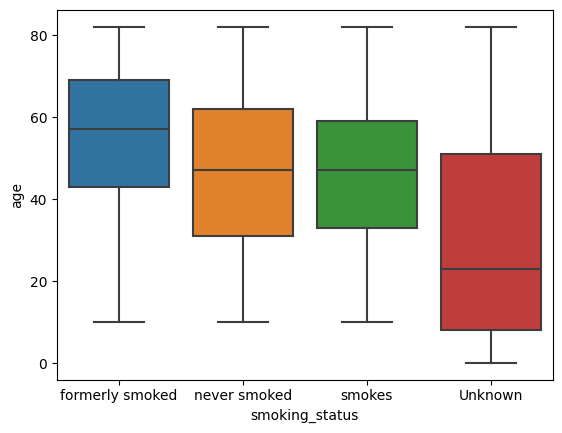

In [117]:
import seaborn as sns

sns.boxplot(y = 'age', x = 'smoking_status', data = data)

Si queremos ver mejor las distribuciones: Gráfico de violín.

<Axes: xlabel='smoking_status', ylabel='age'>

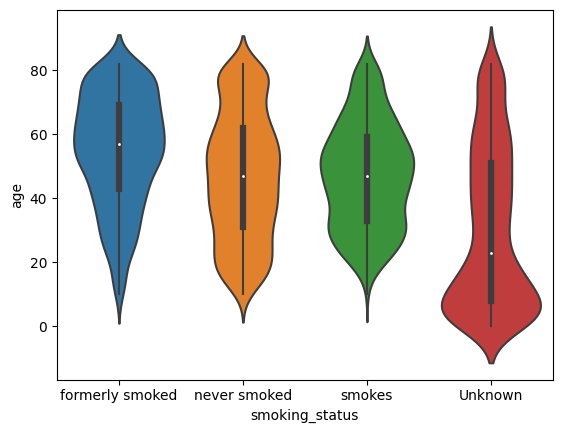

In [118]:
sns.violinplot(y='age', x = 'smoking_status', data = data)

### 3.B) Análisis de categórica vs. categórica

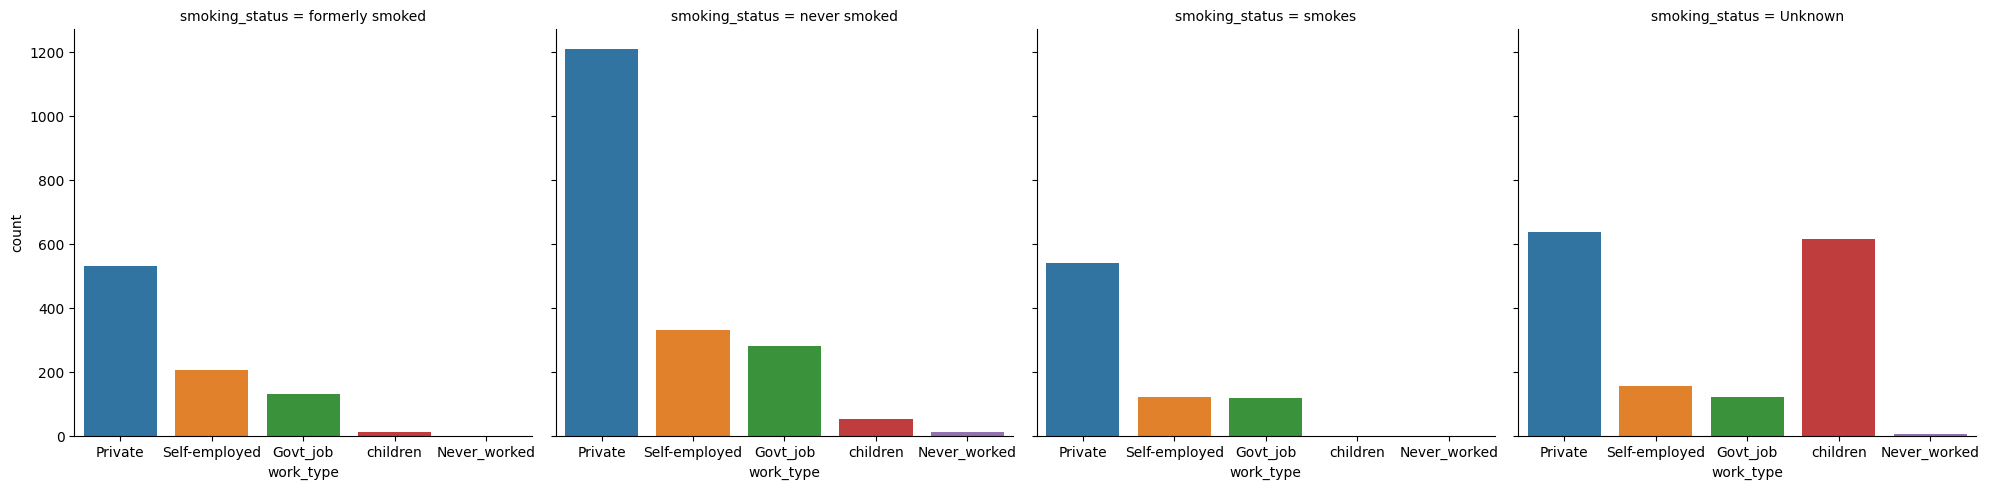

In [119]:
g = sns.catplot(x="work_type",
                col="smoking_status",
                data= data,
                kind="count")

### 3.C) Análisis de numérica vs. numérica

Para todo el dataset, ¡pero con cuidado!

c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Javi\miniconda3\envs\properati-app\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

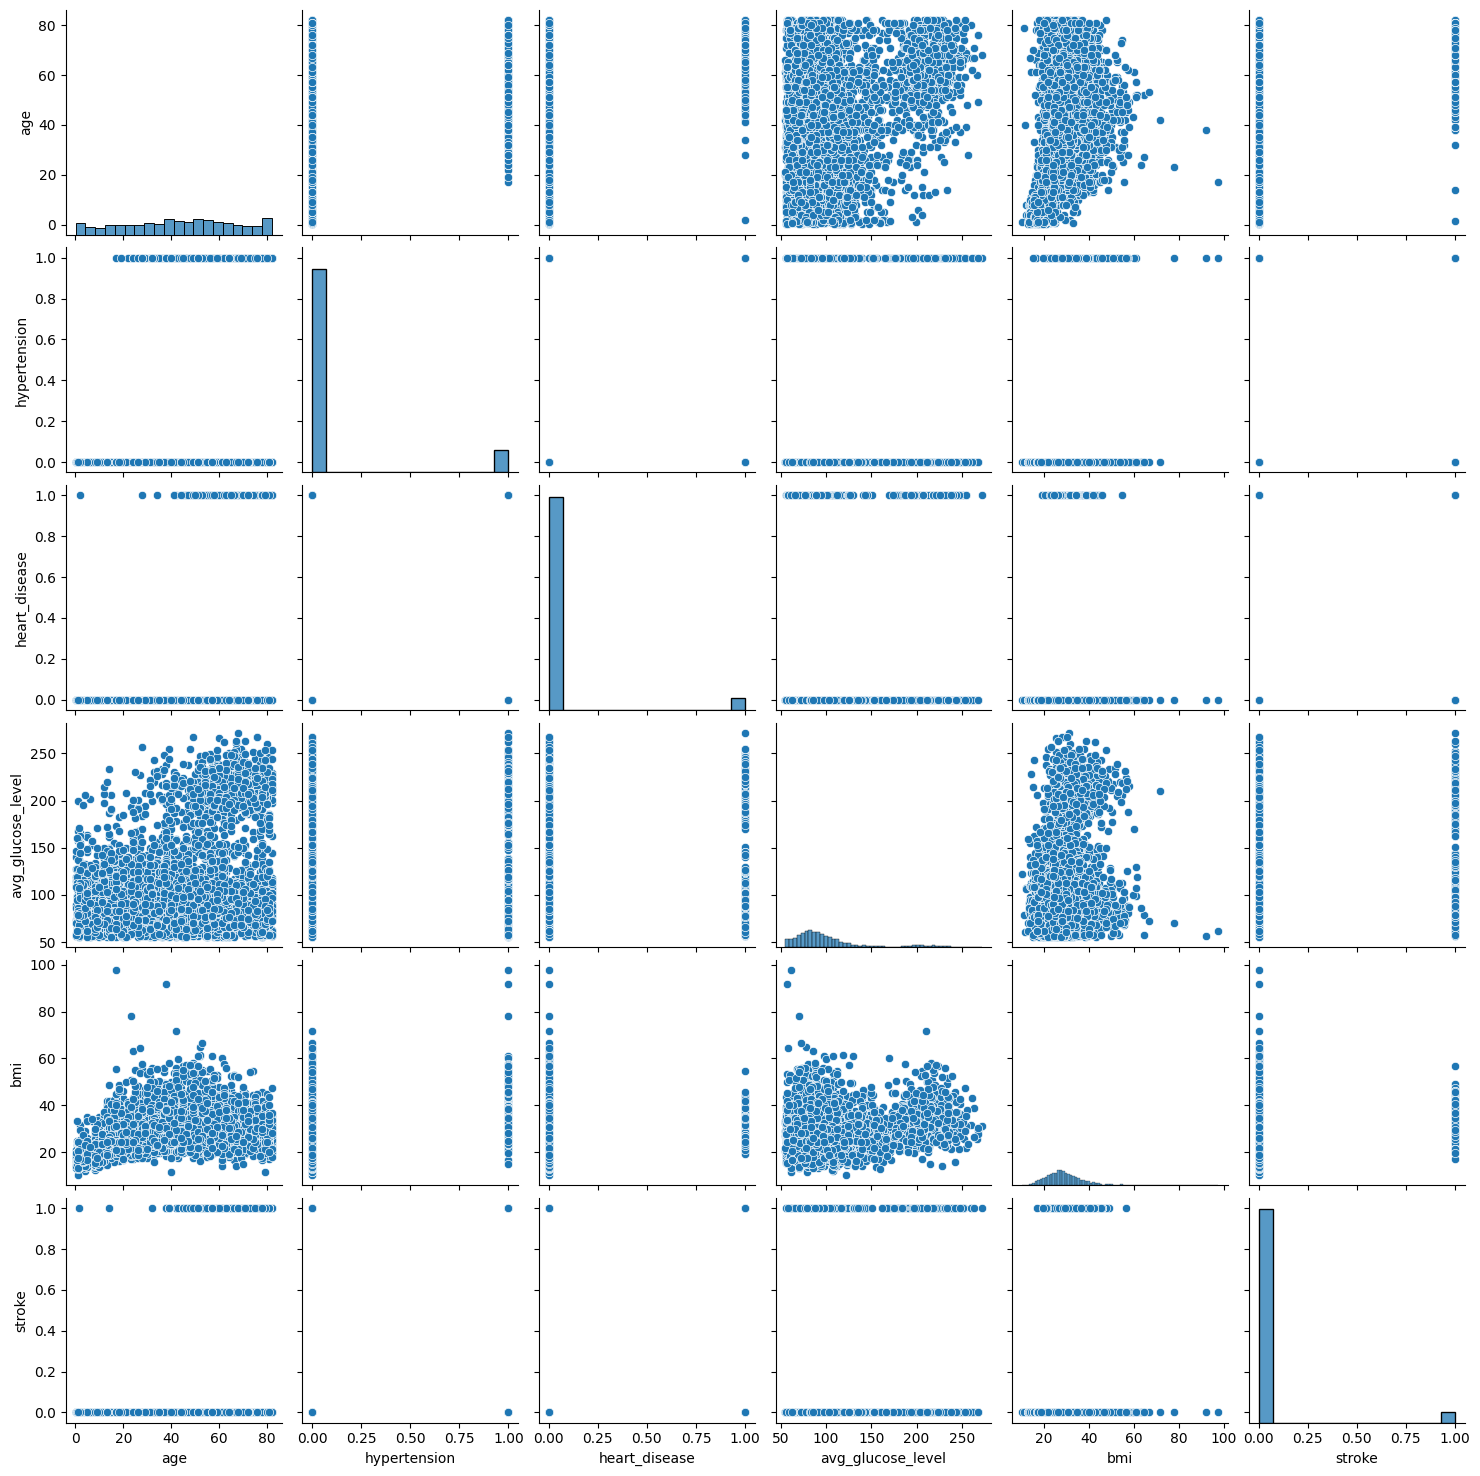

In [120]:
sns.pairplot(data)

## Resumen 📌

- Análisis bivariado (num vs num, cat vs cat, cat vs num)
- Gráficos y analítica (ojo con la combinatoria)
- Precaución con las proporciones.
- Tipos de gráficos: Boxplot, scatter, barras y violín.

# CORRELACIÓN 🤯

#### Resumen estadísticos:

- Pearson (el más conocido y usado), y es parecido a Spearman.
- Phik: sirve para numéricas y categóricas
- Cramer: sirve para categóricas
    

## 0) Esta celda nos va a servir para un 2do análisis
Encarar el proyecto respecto a la correlación desde otro punto de vista.
<br>Consideramos solo las columnas que tienen más de 3 categorías.

In [ ]:
# data = data[['gender', 'work_type', 'smoking_status']].copy()

## 1) ¿Qué hacer si corre lento? 🏃🏼‍♀️ 🏃🏼

**Si tarda porque tiene muchas filas/columnas -> Sample**

Muestra en cantidad de rows:

In [121]:
data_s=data.sample(n=300)

In [122]:
data_s.shape

(300, 11)

En porcentaje de rows:

In [ ]:
data_s2=data.sample(frac=0.6)

## 2) Correlación basado en pandas (pearson)

In [123]:
# Convertir columnas categóricas a numéricas
data_encoded = pd.get_dummies(data)

In [124]:
data.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [125]:
data_encoded.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [126]:
d_cor=data_encoded.corr()
d_cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,0.027924,-0.027623,-0.010659,-0.679125,...,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,-0.021143,0.021275,-0.004597,-0.164243,...,-0.021608,-0.005413,0.115442,-0.129506,0.007913,-0.007913,-0.141501,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,-0.085617,0.085717,-0.003343,-0.114644,...,-0.015712,0.000027,0.086760,-0.091634,-0.003092,0.003092,-0.066731,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,-0.054902,0.054580,0.011489,-0.155068,...,-0.014675,0.016588,0.062694,-0.102250,0.004946,-0.004946,-0.095131,0.068111,0.023885,0.017646
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,0.026360,-0.026020,-0.011802,-0.341695,...,-0.028602,0.208029,0.072701,-0.448674,0.000122,-0.000122,-0.270340,0.107031,0.107964,0.088324
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,-0.009027,0.009117,-0.003166,-0.108340,...,-0.014882,0.011888,0.062168,-0.083869,-0.015458,0.015458,-0.055892,0.064556,-0.004129,0.008939
gender_Female,0.027924,-0.021143,-0.085617,-0.054902,0.026360,-0.009027,1.000000,-0.999597,-0.016642,-0.030483,...,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.026020,0.009117,-0.999597,1.000000,-0.011757,0.029936,...,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937,0.059658,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.016642,-0.011757,1.000000,0.019327,...,-0.000920,0.012092,-0.006112,-0.005514,0.014217,-0.014217,-0.009206,0.030568,-0.010728,-0.005978
ever_married_No,-0.679125,-0.164243,-0.114644,-0.155068,-0.341695,-0.108340,-0.030483,0.029936,0.019327,1.000000,...,0.090838,-0.153830,-0.192716,0.544441,0.006261,-0.006261,0.332081,-0.171256,-0.102845,-0.105226


Esto lo usamos si:

a) son pocas columnas: si son pocas variables

b) ya hicimos una preselección de variables

## 3) Algo más operativo (útil para filtrar): pairwaise correlation

In [127]:
from funpymodeling.exploratory import corr_pair

Visualizamos resultados:

In [128]:
cor_d=corr_pair(data_encoded)

In [129]:
cor_d

,v1,v2,R,R2
1,hypertension,age,0.276398,0.076396
2,heart_disease,age,0.263796,0.069588
3,avg_glucose_level,age,0.238171,0.056725
4,bmi,age,0.333398,0.111154
5,stroke,age,0.245257,0.060151
...,...,...,...,...
478,Residence_type_Rural,smoking_status_smokes,-0.027266,0.000743
479,Residence_type_Urban,smoking_status_smokes,0.027266,0.000743
480,smoking_status_Unknown,smoking_status_smokes,-0.281177,0.079060
481,smoking_status_formerly smoked,smoking_status_smokes,-0.195571,0.038248


Waaaaaarning: Con este enfoque (y estadístico Pearson) nos perdemos las otras variables categóricas.

## 4) Vamos a usar one hot encoding: cat -> num

Enfoque 🐼🐼🐼:

In [130]:
data_test=pd.get_dummies(data)

In [131]:
data_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [132]:
data_test[['smoking_status_Unknown',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']]


,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
5105,False,False,True,False
5106,False,False,True,False
5107,False,False,True,False
5108,False,True,False,False


In [133]:
status(data_test)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,104,float64
1,hypertension,0,0.000000,4612,0.902544,2,int64
2,heart_disease,0,0.000000,4834,0.945988,2,int64
3,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
4,bmi,201,0.039335,0,0.000000,418,float64
5,stroke,0,0.000000,4861,0.951272,2,int64
6,gender_Female,0,0.000000,2116,0.414090,2,bool
7,gender_Male,0,0.000000,2995,0.586106,2,bool
8,gender_Other,0,0.000000,5109,0.999804,2,bool
9,ever_married_No,0,0.000000,3353,0.656164,2,bool


In [135]:
data2=pd.get_dummies(data, dummy_na=True)

Nota: Esto crea la variable nulos para todas las variables categóricas

In [136]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,104,float64
1,hypertension,0,0.000000,4612,0.902544,2,int64
2,heart_disease,0,0.000000,4834,0.945988,2,int64
3,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
4,bmi,201,0.039335,0,0.000000,418,float64
5,stroke,0,0.000000,4861,0.951272,2,int64
6,gender_Female,0,0.000000,2116,0.414090,2,bool
7,gender_Male,0,0.000000,2995,0.586106,2,bool
8,gender_Other,0,0.000000,5109,0.999804,2,bool
9,gender_nan,0,0.000000,5110,1.000000,1,bool


In [137]:
data2[['smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes', 'smoking_status_nan']]

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,True,False,False
...,...,...,...,...,...
5105,False,False,True,False,False
5106,False,False,True,False,False
5107,False,False,True,False,False
5108,False,True,False,False,False


In [138]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,104,float64
1,hypertension,0,0.000000,4612,0.902544,2,int64
2,heart_disease,0,0.000000,4834,0.945988,2,int64
3,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
4,bmi,201,0.039335,0,0.000000,418,float64
5,stroke,0,0.000000,4861,0.951272,2,int64
6,gender_Female,0,0.000000,2116,0.414090,2,bool
7,gender_Male,0,0.000000,2995,0.586106,2,bool
8,gender_Other,0,0.000000,5109,0.999804,2,bool
9,gender_nan,0,0.000000,5110,1.000000,1,bool


Pero... muchos valores unique=1

Sacamos las categorías con valores unicos con un enfoque automatizado

In [ ]:
vars_to_drop=status(data2).query("unique<=1")['variable']

data3=data2.drop(vars_to_drop, axis=1)

In [ ]:
status(data3)

## 5) Volvemos al análisis de correlación: Gráficos 📊

<Axes: >

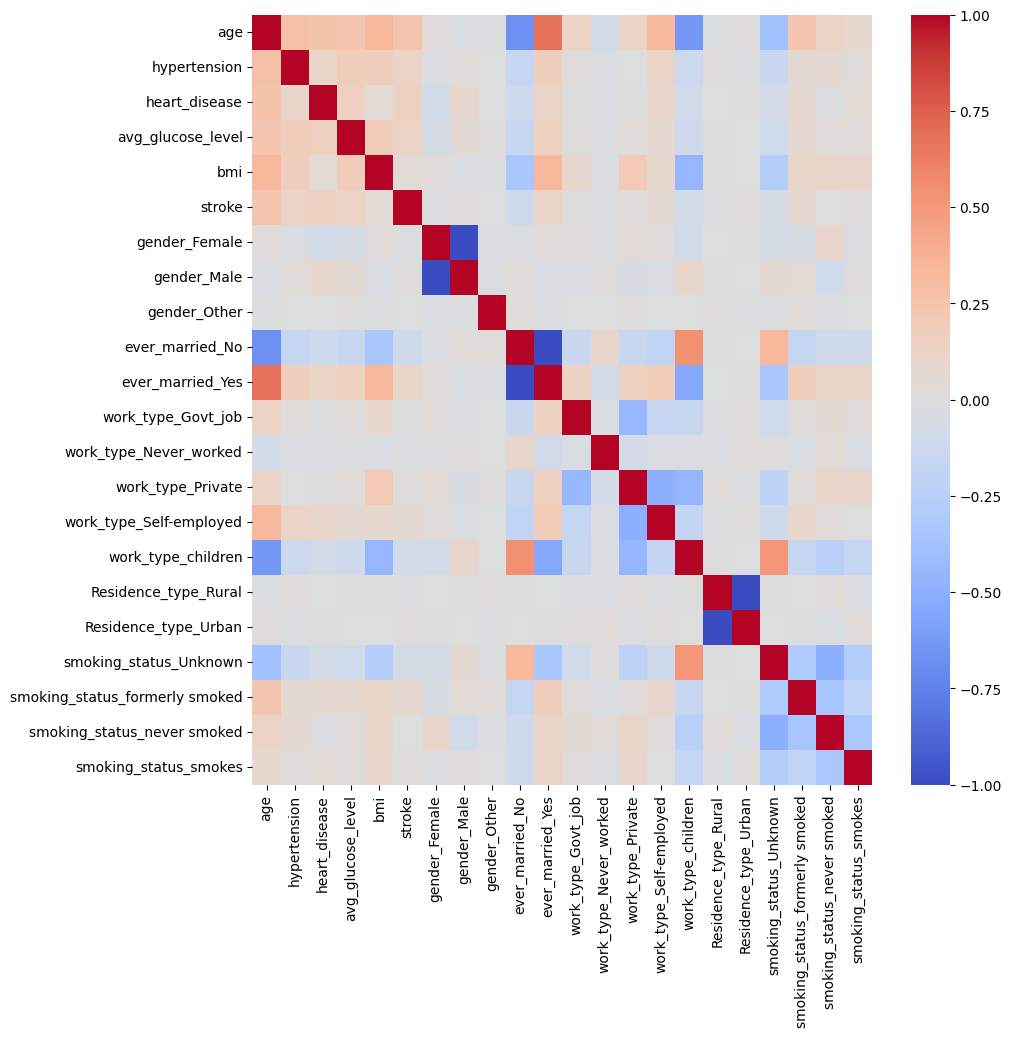

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(data3.corr(), cmap='coolwarm')

Observaciones:

1- No sirve con muchas variables

2- Muchas co-colinealidades 

3- Estaría bueno ordenar por correlación

## 6) Análisis de correlaciones no lineales basadas en teoría de la información

Miners: https://pypi.org/project/miners/
<br>Alternativa a minepy

In [ ]:
!pip install miners

In [ ]:
import miners

# Assuming data3['age'] and data3['heart_disease'] are your data arrays
x = data3['age']
y = data3['heart_disease']

# Define the MINE parameters
param = miners.MineParameter(alpha=0.6, c=15, est=miners.EST.MICe)

# Create the MINE problem
prob = miners.MineProblem(x, y, param)

# Compute the score
score = miners.mine_compute_score(prob, param)

# Access the results (MIC)
mic_result = miners.mine_mic(score)
print(mic_result)

Si quieren analizar más columnas entre sí, pueden hacer un for (loop) variando x e y.

# Extra 🎯

Cuando quieran ver todas las columnas y filas, usen esta celda:

In [ ]:
# Si quieren visualizar todas las columnas, definan None
pd.set_option('display.max_columns', None)
# Si quieren visualizar solo 5 columnas, definan 5
pd.set_option('display.max_rows', 5)

## Resumen 📌

- Vimos correlaciones con ProfileReport
- Tipos de correlaciones: Pearson, Kendall, CramerV y Phi 
- Cosas a tener en cuenta: no linealidades y tipos de datos (numérico y categórico)
- OneHotEncoding con pandas (básico)
- ProfileReport no es útil para ser operativos
- Calculamos R y R2 (pearson)
- Matriz de correlación (y algunos problemas)
- Correlaciones de a pares con funpymodeling (operativo)
- Métricas basadas en teoría de la información (MINE)

---
# Ejercicio 👀

**Objetivo**
<br>Realizar un análisis exploratorio de datos para el área de Recursos Humanos. 
<br>Prácticamente vas a hacer lo que se le conoce como People Analytics.

El dataset proviene de Kaggle: [HR Analytics](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)

**Consigna**

**_AED 1_**
- Para el punto 4) de variables categóricas, analicen la columna `EducationField`
- Para el Análisis cuantitativo de variables categóricas, analicen `MaritalStatus`
- Con respecto a la consulta por query, consideren `t_country.query("frequency<=500")['MaritalStatus']`

**_AED 2_**
- Para el punto 1) Análisis de variables categóricas, consideren la columna `BusinessTravel`
- En 2.A) Análisis de categórica vs. categórica, consideren `BusinessTravel` vrs. `MaritalStatus`. También analicen `Gender` vrs. `Department`
- En 2.B) Análisis de numérica vs. categórica, consideren `Gender` vrs. `JobSatisfaction`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Gender`
- En 2.C) Análisis de numérica vs. numérica `JobLevel` vrs. `StockOptionLevel`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Age`
- Para todos los puntos 3) consideren `JobSatisfaction` vrs. `Gender`

**_Correlación_**
- Para 4) One hot encoding analicen que pasa con `data_test[['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]`

**A tener en cuenta** 😀 

Basarse en el notebook que hicimos en la clase.
<br> El objetivo es que una vez corrido todo el notebook, saquen **7** insights del análisis que les pareció relevante.
<br>Como por ejemplo: Hay un porcentaje elevado de jobSatisfaction en hombres respecto a las mujeres.
